In [2]:
!pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     --------------------- ---------------- 524.3/948.2 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139014 sha256=c5ba17f12f80f12ba85d143cf309d0fa1b33ff49743864788537ac4b7e6e3626
  Stored in directory: c:\users\owner\appdata\local\pip\cache\wheels\8f\65\34\456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successf

ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'C:\\Python312\\Scripts\\pwiz.py'
Consider using the `--user` option or check the permissions.



In [78]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the stock ticker and the period for which you want the data
ticker = 'AAPL'
period = 'max'

# Download the stock data
stock_data = yf.download(ticker, period=period)

# Create a DataFrame with the specified columns
df = pd.DataFrame(stock_data)
df.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-31,250.419998,253.279999,249.429993,252.440002,39480700
2025-01-02,243.850006,249.100006,241.820007,248.929993,55740700
2025-01-03,243.360001,244.179993,241.889999,243.360001,40244100
2025-01-06,245.000000,247.330002,243.199997,244.309998,45045600
2025-01-07,242.210007,245.550003,241.350006,242.979996,40797900


In [79]:
df.shape

(11109, 5)

In [81]:
data =  df.filter([( 'Close', 'AAPL')])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
testing_data_len = data.shape[0] - training_data_len

In [82]:
dataset

array([[9.88344923e-02],
       [9.36782211e-02],
       [8.68024528e-02],
       ...,
       [2.43360001e+02],
       [2.45000000e+02],
       [2.42210007e+02]])

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[2.35613197e-04],
       [2.15703444e-04],
       [1.89154249e-04],
       ...,
       [9.39532563e-01],
       [9.45865042e-01],
       [9.35092126e-01]])

In [84]:
v = scaled_data[0:60,0]
v.shape

(60,)

In [85]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00023561, 0.0002157 , 0.00018915, 0.00019745, 0.00020741,
       0.00022898, 0.00024723, 0.00026382, 0.00028539, 0.00032521,
       0.00033185, 0.00032024, 0.00030696, 0.00031194, 0.00030198,
       0.00028207, 0.00026382, 0.00025553, 0.00027709, 0.00027378,
       0.00025884, 0.0002605 , 0.0002688 , 0.00026548, 0.00029037,
       0.00027709, 0.00028539, 0.00029037, 0.00028871, 0.00028207,
       0.00027875, 0.00026548, 0.00025055, 0.00022898, 0.00020741,
       0.00022068, 0.00023395, 0.00023395, 0.00023561, 0.0002157 ,
       0.0002157 , 0.00020409, 0.00020077, 0.00019247, 0.00020077,
       0.0002157 , 0.00019413, 0.00017588, 0.00018086, 0.00016924,
       0.00018915, 0.00019413, 0.00020575, 0.00020741, 0.00020243,
       0.00019911, 0.00019745, 0.00019413, 0.00016759, 0.00015265])]
[0.00014103595052532373]

[array([0.00023561, 0.0002157 , 0.00018915, 0.00019745, 0.00020741,
       0.00022898, 0.00024723, 0.00026382, 0.00028539, 0.00032521,
       0.00033185, 0.00032024, 0

In [86]:
x_train.shape

(10494, 60, 1)

In [87]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10494/10494 ━━━━━━━━━━━━━━━━━━━━ 339s 32ms/step - loss: 5.0563e-04


array([[0.82233255],
       [0.8342756 ]])

In [88]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step


13.334211388447576

In [89]:
test_data.shape

(615, 1)

In [31]:
y_test

array([[254.49000549],
       [255.27000427],
       [258.20001221],
       [259.01998901],
       [255.58999634],
       [252.19999695],
       [250.41999817],
       [243.8500061 ],
       [243.36000061],
       [245.        ],
       [242.21000671],
       [243.33999634]])

In [44]:
x_test = []
for i in range(60,len(test_data)):
    x_test.append(test_data[i - 60:i,0])

In [46]:
len(x_test)

12

In [47]:
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [90]:
dataset[training_data_len:] == y_test

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [91]:
predictions

array([[136.92921 ],
       [138.12955 ],
       [139.76106 ],
       [141.75423 ],
       [142.04863 ],
       [140.50317 ],
       [142.82074 ],
       [144.14995 ],
       [143.98637 ],
       [141.87282 ],
       [138.37405 ],
       [136.05688 ],
       [135.15724 ],
       [135.10094 ],
       [133.66377 ],
       [136.2881  ],
       [139.27429 ],
       [140.48795 ],
       [141.34035 ],
       [141.35214 ],
       [141.9149  ],
       [142.6526  ],
       [142.19664 ],
       [142.5031  ],
       [143.13718 ],
       [142.64044 ],
       [140.91577 ],
       [138.72353 ],
       [139.5854  ],
       [140.7404  ],
       [141.29341 ],
       [141.05354 ],
       [139.50653 ],
       [137.71135 ],
       [137.18852 ],
       [137.00055 ],
       [137.71834 ],
       [138.56706 ],
       [138.28107 ],
       [135.6832  ],
       [133.07083 ],
       [130.86784 ],
       [129.68456 ],
       [130.20573 ],
       [129.71431 ],
       [128.98523 ],
       [127.7628  ],
       [125.5

In [92]:
data["predictions"] = 0

In [93]:
data

,Close,predictions
,AAPL,
Date,,
1980-12-12,0.098834,0
1980-12-15,0.093678,0
1980-12-16,0.086802,0
1980-12-17,0.088951,0
1980-12-18,0.091530,0
...,...,...
2024-12-31,250.419998,0
2025-01-02,243.850006,0


In [94]:
data.iloc[training_data_len:, data.columns.get_loc("predictions")] = predictions.flatten()

C:\Users\owner\AppData\Local\Temp\ipykernel_14924\826917985.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[136.92921  138.12955  139.76106  141.75423  142.04863  140.50317
 142.82074  144.14995  143.98637  141.87282  138.37405  136.05688
 135.15724  135.10094  133.66377  136.2881   139.27429  140.48795
 141.34035  141.35214  141.9149   142.6526   142.19664  142.5031
 143.13718  142.64044  140.91577  138.72353  139.5854   140.7404
 141.29341  141.05354  139.50653  137.71135  137.18852  137.00055
 137.71834  138.56706  138.28107  135.6832   133.07083  130.86784
 129.68456  130.20573  129.71431  128.98523  127.7628   125.557976
 125.18571  125.39942  124.05135  123.33044  122.51132  123.440125
 124.421425 125.13976  126.34854  127.091606 127.88573  128.77527
 129.13574  129.33386  130.31886  132.13615  133.84312  134.62398
 135.6084   136.89532  136.83742  137.06886  137.70427  139.95505
 142.77005  1

In [96]:
data.columns = ["Close","predictions"]

In [97]:
data

,Close,predictions
Date,,
1980-12-12,0.098834,0.000000
1980-12-15,0.093678,0.000000
1980-12-16,0.086802,0.000000
1980-12-17,0.088951,0.000000
1980-12-18,0.091530,0.000000
...,...,...
2024-12-31,250.419998,227.245529
2025-01-02,243.850006,225.932434
2025-01-03,243.360001,223.432373


In [75]:
import matplotlib.pyplot as plt

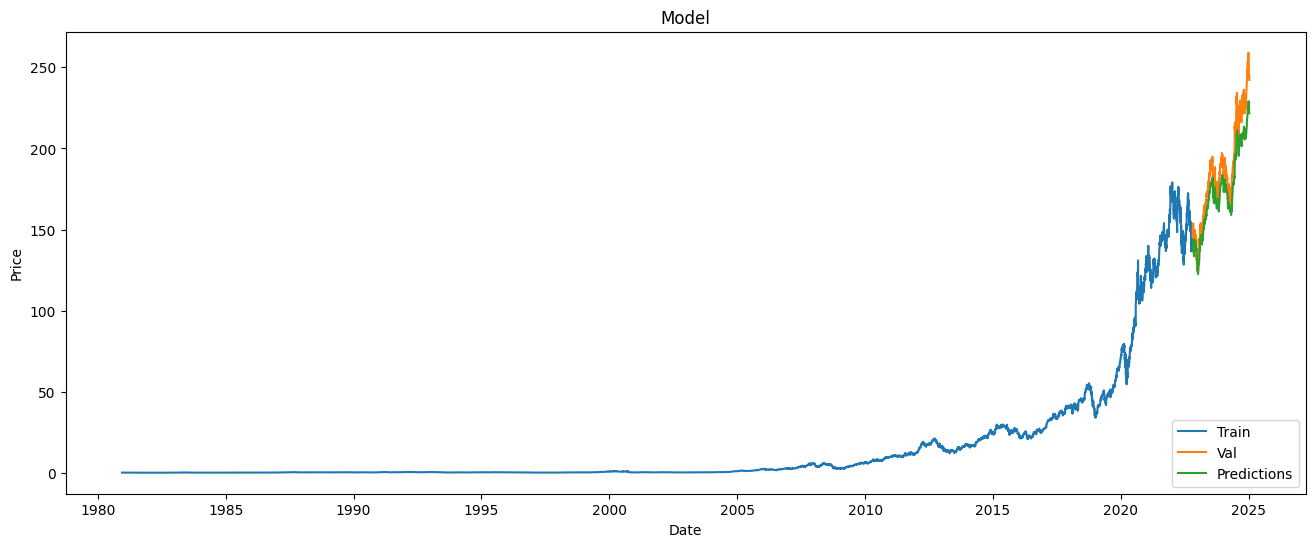

In [98]:
plt.figure(figsize=(16,6))
plt.title("Model")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(data["Close"].iloc[:training_data_len])
plt.plot(data["Close"].iloc[training_data_len:])
plt.plot(data["predictions"].iloc[training_data_len:])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [99]:
model.save("apple.h5")

In [101]:
model.save("apple.keras")

In [102]:
from keras.models import load_model

test_model = load_model(r"C:\Users\owner\Desktop\2025\stock-prediction\api\Model\apple.keras")

c:\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [106]:
pred = test_model.predict(x_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [109]:
pred = scaler.inverse_transform(pred)

In [ ]:
pred == predictions

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [111]:
data

,Close,predictions
Date,,
1980-12-12,0.098834,0.000000
1980-12-15,0.093678,0.000000
1980-12-16,0.086802,0.000000
1980-12-17,0.088951,0.000000
1980-12-18,0.091530,0.000000
...,...,...
2024-12-31,250.419998,227.245529
2025-01-02,243.850006,225.932434
2025-01-03,243.360001,223.432373


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11109 entries, 1980-12-12 to 2025-01-07
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   11109 non-null  float64
 1   (High, AAPL)    11109 non-null  float64
 2   (Low, AAPL)     11109 non-null  float64
 3   (Open, AAPL)    11109 non-null  float64
 4   (Volume, AAPL)  11109 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 520.7 KB


In [118]:
new_data = df.filter([("Close","AAPL")])

In [120]:
new_data.columns = ["close"]

In [124]:
dataset

array([[9.88344923e-02],
       [9.36782211e-02],
       [8.68024528e-02],
       ...,
       [2.43360001e+02],
       [2.45000000e+02],
       [2.42210007e+02]])

In [122]:
data_values = new_data.values

In [142]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_values)

In [156]:
test_data = scaled_data[training_data_len:]
x_test = []

for i in range(60,len(test_data)):
    x_test.append(test_data[i - 60:i,0])

In [215]:
data_array = test_data[-61:-1,0]

In [181]:
x_test[-1]

array([0.88326724, 0.87752029, 0.89198414, 0.90181955, 0.89383547,
       0.89526259, 0.9062551 , 0.91196351, 0.9095722 , 0.88990132,
       0.88916855, 0.89240841, 0.90008387, 0.90112526, 0.8873557 ,
       0.87119476, 0.85962368, 0.85615233, 0.86170644, 0.85889085,
       0.87725026, 0.87620776, 0.86566646, 0.86566646, 0.86910298,
       0.88107294, 0.86863965, 0.8803007 , 0.88130461, 0.88408473,
       0.88223134, 0.88744401, 0.89902782, 0.90748401, 0.90698203,
       0.91624911, 0.92497556, 0.93679104, 0.93818109, 0.93829693,
       0.93752469, 0.95262226, 0.95656078, 0.95161836, 0.95729443,
       0.95795084, 0.96918708, 0.97860859, 0.95764193, 0.9643605 ,
       0.98250851, 0.9855203 , 0.99683385, 1.        , 0.98675587,
       0.97366617, 0.96679312, 0.94142461, 0.93953256, 0.94586504])

In [147]:
test_data.shape

(60, 1)

In [189]:
def get_pred(test_data:list)-> float:
    x_test = np.array(test_data)

    # Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

    # Get the models predicted price values 
    predictions = model.predict(x_test)
    # predictions = scaler.inverse_transform(predictions)
    return predictions

In [216]:
predictions = []
for i in range(100):
    result = get_pred([data_array])
    predictions.append(scaler.inverse_transform(result))
    data_array = np.append(data_array,result[0])[-60:]
    print(f"Done predicting for {i}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Done predicting for 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Done predicting for 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Done predicting for 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Done predicting for 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Done predicting for 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Done predicting for 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Done predicting for 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Done predicting for 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Done predicting for 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Done predicting for 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Done predicting for 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Done predicting for 11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Done predicting for 12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Done predicting for 13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Done predicting for 14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Done predicting for 15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [218]:
predictions = [arr.item() for arr in predictions]
predictions

[221.7320098876953,
 214.997802734375,
 208.43316650390625,
 202.75697326660156,
 198.01419067382812,
 193.995361328125,
 190.43634033203125,
 187.1160125732422,
 183.90419006347656,
 180.76364135742188,
 177.71859741210938,
 174.81166076660156,
 172.07073974609375,
 169.4954833984375,
 167.06304931640625,
 164.74310302734375,
 162.51158142089844,
 160.3570556640625,
 158.27854919433594,
 156.2796630859375,
 154.36224365234375,
 152.52342224121094,
 150.7563934326172,
 149.05282592773438,
 147.40576171875,
 145.81072998046875,
 144.2655029296875,
 142.76898193359375,
 141.31980895996094,
 139.91604614257812,
 138.55490112304688,
 137.2334442138672,
 135.94900512695312,
 134.69949340820312,
 133.48336791992188,
 132.29930114746094,
 131.1461181640625,
 130.02247619628906,
 128.927001953125,
 127.85826110839844,
 126.81500244140625,
 125.79605102539062,
 124.8003921508789,
 123.82713317871094,
 122.87541198730469,
 121.94438934326172,
 121.0332260131836,
 120.1411361694336,
 119.26734924

In [191]:
results = get_pred([test_data[-61:-1,0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [212]:
scaler.inverse_transform(results)

array([[221.73201]], dtype=float32)

In [195]:
c = np.append(data_array,results)

In [199]:
c[-60:]

array([0.87752029, 0.89198414, 0.90181955, 0.89383547, 0.89526259,
       0.9062551 , 0.91196351, 0.9095722 , 0.88990132, 0.88916855,
       0.89240841, 0.90008387, 0.90112526, 0.8873557 , 0.87119476,
       0.85962368, 0.85615233, 0.86170644, 0.85889085, 0.87725026,
       0.87620776, 0.86566646, 0.86566646, 0.86910298, 0.88107294,
       0.86863965, 0.8803007 , 0.88130461, 0.88408473, 0.88223134,
       0.88744401, 0.89902782, 0.90748401, 0.90698203, 0.91624911,
       0.92497556, 0.93679104, 0.93818109, 0.93829693, 0.93752469,
       0.95262226, 0.95656078, 0.95161836, 0.95729443, 0.95795084,
       0.96918708, 0.97860859, 0.95764193, 0.9643605 , 0.98250851,
       0.9855203 , 0.99683385, 1.        , 0.98675587, 0.97366617,
       0.96679312, 0.94142461, 0.93953256, 0.94586504, 0.85602105])

In [197]:
x_test[-1]

array([0.88326724, 0.87752029, 0.89198414, 0.90181955, 0.89383547,
       0.89526259, 0.9062551 , 0.91196351, 0.9095722 , 0.88990132,
       0.88916855, 0.89240841, 0.90008387, 0.90112526, 0.8873557 ,
       0.87119476, 0.85962368, 0.85615233, 0.86170644, 0.85889085,
       0.87725026, 0.87620776, 0.86566646, 0.86566646, 0.86910298,
       0.88107294, 0.86863965, 0.8803007 , 0.88130461, 0.88408473,
       0.88223134, 0.88744401, 0.89902782, 0.90748401, 0.90698203,
       0.91624911, 0.92497556, 0.93679104, 0.93818109, 0.93829693,
       0.93752469, 0.95262226, 0.95656078, 0.95161836, 0.95729443,
       0.95795084, 0.96918708, 0.97860859, 0.95764193, 0.9643605 ,
       0.98250851, 0.9855203 , 0.99683385, 1.        , 0.98675587,
       0.97366617, 0.96679312, 0.94142461, 0.93953256, 0.94586504])